## Imports and Connect/Disconenect

In [ ]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt 
from scipy.constants import pi
from scipy.fftpack import fft

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [343]:
ble.disconnect()

2025-02-18 06:44:35,437 | INFO     |: Disconnected from 62F1AC90-724A-C058-8283-6E00EDFFCB52


In [235]:
ble = get_ble_controller()
ble.connect()

2025-02-18 02:56:59,634 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:C3:08:22:12:51
2025-02-18 02:57:02,546 | INFO     |: Connected to C0:C3:08:22:12:51


# Lab 1

## Part 1

In [45]:
ble.send_command(CMD.ECHO, "Stop copying me!")
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

Robot says -> Stop copying me! :)


2025-02-11 15:30:57,572 | INFO     |: Disconnected from 62F1AC90-724A-C058-8283-6E00EDFFCB52


## Part 2

In [299]:
ble.send_command(CMD.SEND_THREE_FLOATS, "1.23|9.81|234.91")

## Part 3

In [297]:
ble.send_command(CMD.GET_TIME_MILLIS, "")
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

T:55527


## Part 4

In [39]:
temps, times = [], []

def noti_handler(uuid, byte_array):
    s = ble.bytearray_to_string(byte_array)
    temp_ind = s.find("F:")
    if temp_ind != -1:
        times.append(int(s[2 : temp_ind]))
        temps.append(int(s[temp_ind + 2:]))
    else:
        times.append(int(s[2:]))
    

ble.start_notify(ble.uuid['RX_STRING'], noti_handler)

In [10]:
ble.stop_notify(ble.uuid['RX_STRING'])

## Part 5

In [ ]:
times = []
ble.send_command(CMD.F, "")

In [328]:
print(f"Message Send Rate: {(((len(times) - 1) / (times[-1] -  times[0])) * 1000):.2f}")
print(times[:10])

Message Send Rate: 58.93
[176271, 176271, 176271, 176271, 176299, 176330, 176330, 176361, 176361, 176361]


## Part 6

In [42]:
times = []
ble.send_command(CMD.FILL_TIME_ARRAY, "")
ble.send_command(CMD.SEND_TIME_ARRAY, "")

2025-02-11 02:16:23,423 | INFO     |: Disconnected from 62F1AC90-724A-C058-8283-6E00EDFFCB52


In [32]:
print(f"Message Send Rate: {((len(times) - 1) / (times[-1] -  times[0])) * 1000}")
print(times)

Message Send Rate: 49500.0
[317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317907, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317908, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909, 317909]


2025-02-11 01:52:40,607 | INFO     |: Disconnected from 62F1AC90-724A-C058-8283-6E00EDFFCB52


## Part 7

In [41]:
times, temps = [], []
ble.send_command(CMD.FILL_TEMP_ARRAY, "")
ble.send_command(CMD.SEND_TEMP_ARRAY, "")

In [38]:
for i in range(10):
    print(f"Timestamp: {times[i]}, Temperature: {temps[i]}")

IndexError: list index out of range

# Lab 2

## Accelerometer

In [195]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [ ]:
times, pitches, rolls = [], [], []
ble.send_command(CMD.ACC_COLLECT, "")

Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerome

In [151]:
print(len(rolls))

1200


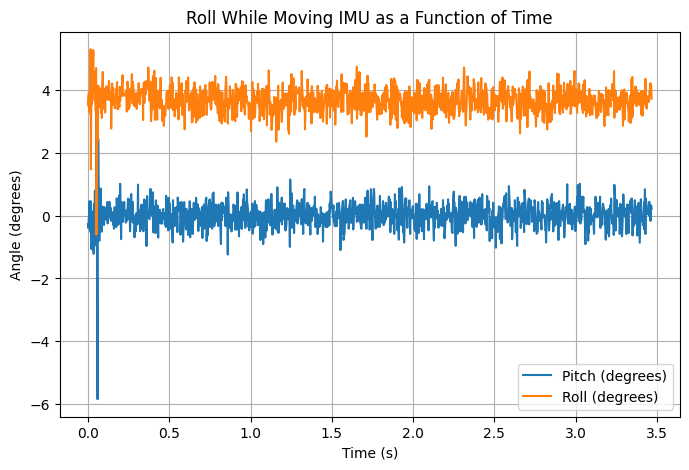

In [254]:

graph_times = [(times[x] - times[0])/1000 for x in range(len(times))]
plt.figure(figsize=(8, 5))
plt.plot(graph_times, pitches, label="Pitch (degrees)", linestyle='-')
plt.plot(graph_times, rolls, label="Roll (degrees)", linestyle='-')

plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Roll While Moving IMU as a Function of Time")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
tot_time = 0
for i in range(1, len(graph_times)):
    tot_time += graph_times[i] - graph_times[i - 1]

print(tot_time / (len(graph_times)-1))


0.003047539616346956


Hello!
['2575862', '-89.972', '87.797']
Hello!
['2575868', '-89.859', '79.114']
Hello!
['2575870', '-89.298', '50.194']
Hello!
['2575872', '-89.103', '47.563']
Hello!
['2575879', '-89.293', '57.994']
Hello!
['2575881', '-89.411', '54.090']
Hello!
['2575883', '-88.858', '42.825']
Hello!
['2575889', '-89.527', '68.875']
Hello!
['2575891', '-88.929', '43.492']
Hello!
['2575893', '-89.775', '70.016']
Hello!
['2575897', '-89.293', '57.339']
Hello!
['2575899', '-89.053', '36.326']
Hello!
['2575901', '-89.349', '42.397']
Hello!
['2575904', '-89.018', '45.000']
Hello!
['2575906', '-89.326', '26.565']
Hello!
['2575908', '-90.000', '90.000']
Hello!
['2575912', '-89.241', '63.434']
Hello!
['2575914', '-89.017', '34.438']
Hello!
['2575916', '-89.354', '41.009']
Hello!
['2575922', '-88.846', '40.486']
Hello!
['2575924', '-90.027', '91.789']
Hello!
['2575925', '-89.607', '68.749']
Hello!
['2575927', '-89.266', '50.906']
Hello!
['2575929', '-89.664', '70.016']
Hello!
['2575931', '-89.109', '33.274']


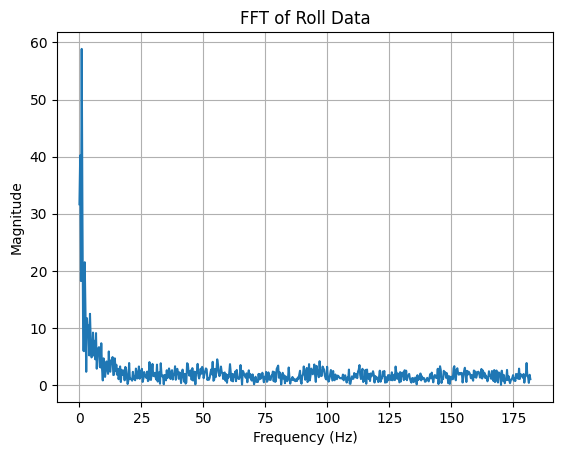

In [ ]:
dt = np.diff(graph_times)
fs = 1 / np.mean(dt)

N = len(rolls)

freq_data = np.fft.fft(rolls)  

frequencies = np.fft.fftfreq(N, d=np.mean(dt))

half_N = N // 2 
freqs = frequencies[:half_N]
fft_magnitude = 2/N * np.abs(freq_data[:half_N]) 

plt.plot(freqs, fft_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Roll Data")
plt.grid()
plt.show()

In [315]:
fc = 10
RC = 1 / (2 * pi * fc)
T = np.mean(dt)
alpha = T / (T + RC)
print(f"alpha: {alpha}")

alpha: 0.1471306111115718


In [334]:
times, pitches, rolls, lpf_pitches, lpf_rolls = [], [], [], [], []
ble.send_command(CMD.ACC_COLLECT, "")

Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerometer data requested!
Accelerome

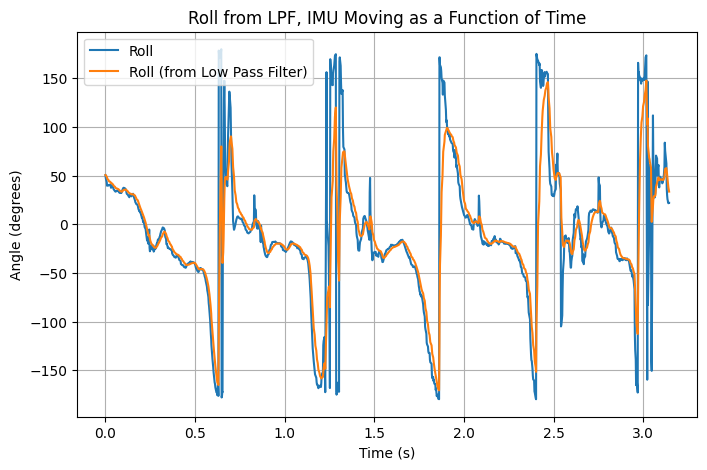

In [338]:
graph_times = [(times[x] - times[0])/1000 for x in range(len(times))]
plt.figure(figsize=(8, 5))
# plt.plot(graph_times, pitches, label="Pitch", linestyle='-')
# plt.plot(graph_times, lpf_pitches, label="Pitch (from Low Pass Filter)", linestyle='-')
plt.plot(graph_times, rolls, label="Roll", linestyle='-')
plt.plot(graph_times, lpf_rolls, label="Roll (from Low Pass Filter)", linestyle='-')

plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Roll from LPF, IMU Moving as a Function of Time")
plt.legend()
plt.grid(True)

plt.show()

In [363]:
ble = get_ble_controller()
ble.connect()

2025-02-18 06:56:39,620 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:C3:08:22:12:51
2025-02-18 06:56:42,565 | INFO     |: Connected to C0:C3:08:22:12:51


In [364]:
times, pitches, rolls, lpf_pitches, lpf_rolls, gyr_pitches, gyr_rolls, gyr_yaws = [], [], [], [], [], [], [], []

def noti_handler(uuid, byte_array):  
    s = ble.bytearray_to_string(byte_array)
    s_array = s.split('@')
    if s_array[0] == "ACC":
        print("Accelerometer data requested!")
        times.append(int(s_array[1]))
        pitches.append(float(s_array[2]))
        rolls.append(float(s_array[3]))
        lpf_pitches.append(float(s_array[4]))
        lpf_rolls.append(float(s_array[5]))
    elif s_array[0] == "GYR":
        print(s_array)
        times.append(int(s_array[1]))
        gyr_pitches.append(float(s_array[2]))
        gyr_rolls.append(float(s_array[3]))
        gyr_yaws.append(float(s_array[4]))
    elif s_array[0] ==  "COMP":
        print(s_array)
        times.append(int(s_array[1]))
        lpf_pitches.append(float(s_array[2]))
        lpf_rolls.append(float(s_array[3]))
        gyr_pitches.append(float(s_array[4]))
        gyr_rolls.append(float(s_array[5]))
        pitches.append(float(s_array[6]))
        rolls.append(float(s_array[7]))


ble.start_notify(ble.uuid['RX_STRING'], noti_handler)

In [ ]:
times, gyr_pitches, gyr_rolls, gyr_yaws = [], [], [], []
ble.send_command(CMD.GYR_COLLECT, "")

In [ ]:
def unit_circle_rotate(angle):
    return (angle + 180) % 360 - 180

['GYR', '12562149', '-70.603', '-1.149', '5.460']
['GYR', '12573772', '-70.590', '-1.181', '5.441']
['GYR', '12584775', '-70.605', '-1.197', '5.418']
['GYR', '12595777', '-70.600', '-1.179', '5.452']
['GYR', '12606774', '-70.595', '-1.192', '5.444']
['GYR', '12617775', '-70.584', '-1.203', '5.437']
['GYR', '12628774', '-70.607', '-1.243', '5.430']
['GYR', '12639775', '-70.609', '-1.271', '5.395']
['GYR', '12650774', '-70.610', '-1.285', '5.369']
['GYR', '12661774', '-70.619', '-1.280', '5.391']
['GYR', '12672772', '-70.627', '-1.281', '5.371']
['GYR', '12683774', '-70.657', '-1.286', '5.374']
['GYR', '12694771', '-70.687', '-1.290', '5.389']
['GYR', '12705773', '-70.699', '-1.318', '5.393']
['GYR', '12716775', '-70.709', '-1.343', '5.387']
['GYR', '12727774', '-70.756', '-1.344', '5.424']
['GYR', '12738773', '-70.788', '-1.352', '5.435']
['GYR', '12749774', '-70.793', '-1.363', '5.419']
['GYR', '12760774', '-70.823', '-1.362', '5.416']
['GYR', '12771775', '-70.845', '-1.359', '5.389']


1200


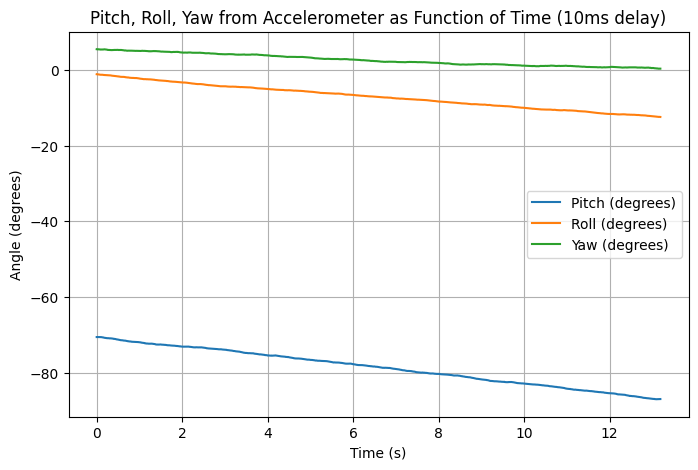

2025-02-18 05:17:31,796 | INFO     |: Disconnected from 62F1AC90-724A-C058-8283-6E00EDFFCB52


In [313]:
graph_times = [(times[x] - times[0])/1000000 for x in range(len(times))]
print(len(graph_times))
plt.figure(figsize=(8, 5))
gyr_pitches_graph = [unit_circle_rotate(gyr_pitches[i]) for i in range(len(gyr_pitches))]
gyr_rolls_graph = [unit_circle_rotate(gyr_rolls[i]) for i in range(len(gyr_rolls))]
gyr_yaws_graph = [unit_circle_rotate(gyr_yaws[i]) for i in range(len(gyr_yaws))]
plt.plot(graph_times, gyr_pitches_graph, label="Pitch (degrees)", linestyle='-')
plt.plot(graph_times, gyr_rolls_graph, label="Roll (degrees)", linestyle='-')
plt.plot(graph_times, gyr_yaws_graph, label="Yaw (degrees)", linestyle='-')


plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Pitch, Roll, Yaw from Accelerometer as Function of Time (10ms delay)")
plt.legend()
plt.grid(True)

plt.show()

In [365]:
times, pitches, rolls, lpf_pitches, lpf_rolls, gyr_pitches, gyr_rolls, gyr_yaws = [], [], [], [], [], [], [], []
ble.send_command(CMD.COMP_FILTER, "")

['COMP', '26405', '-88.898', '-75.609', '-45.508', '12.887', '-88.898', '-75.609']
['COMP', '26407', '-88.846', '-74.916', '-45.513', '12.885', '-88.886', '-75.403']
['COMP', '26410', '-88.775', '-72.877', '-45.507', '12.885', '-88.849', '-74.645']
['COMP', '26412', '-88.728', '-71.299', '-45.509', '12.883', '-88.813', '-73.643']
['COMP', '26414', '-88.866', '-72.898', '-45.513', '12.882', '-88.832', '-73.420']
['COMP', '26421', '-88.894', '-73.227', '-45.523', '12.881', '-88.858', '-73.362']
['COMP', '26423', '-88.676', '-70.926', '-45.528', '12.881', '-88.807', '-72.632']
['COMP', '26425', '-88.738', '-71.554', '-45.534', '12.882', '-88.791', '-72.308']
['COMP', '26431', '-88.693', '-70.991', '-45.560', '12.887', '-88.779', '-71.909']
['COMP', '26433', '-88.637', '-70.782', '-45.562', '12.884', '-88.738', '-71.573']
['COMP', '26435', '-88.660', '-70.903', '-45.566', '12.882', '-88.718', '-71.373']
['COMP', '26442', '-88.765', '-71.635', '-45.593', '12.877', '-88.750', '-71.456']
['CO

1200


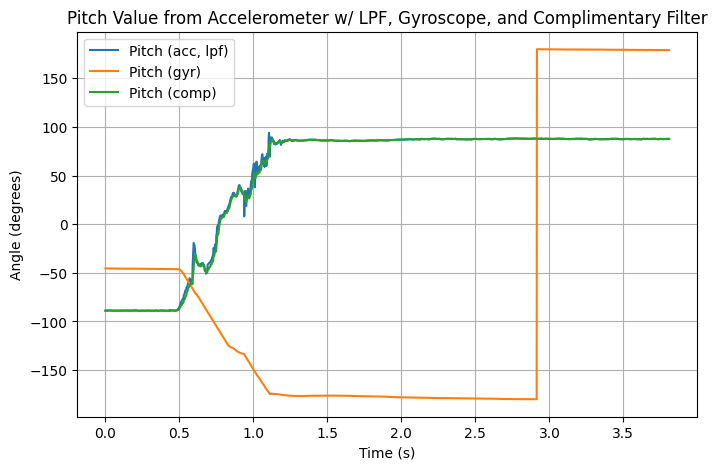

In [ ]:
graph_times = [(times[x] - times[0])/1000 for x in range(len(times))]
print(len(graph_times))
plt.figure(figsize=(8, 5))

gyr_pitches_graph = [unit_circle_rotate(gyr_pitches[i]) for i in range(len(gyr_pitches))]
gyr_rolls_graph = [unit_circle_rotate(gyr_rolls[i]) for i in range(len(gyr_rolls))]

# plt.plot(graph_times, lpf_pitches, label="Pitch (acc, lpf)", linestyle='-')
# plt.plot(graph_times, gyr_pitches_graph, label="Pitch (gyr)", linestyle='-')
# plt.plot(graph_times, pitches, label="Pitch (comp)", linestyle='-')
plt.plot(graph_times, lpf_rolls, label="Roll (acc, lpf)", linestyle='-')
plt.plot(graph_times, gyr_rolls_graph, label="Roll (gyr)", linestyle='-')
plt.plot(graph_times, rolls, label="Roll (comp)", linestyle='-')



plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Pitch from Accelerometer w/ LPF, Gyroscope, and Complimentary Filter")
plt.legend()
plt.grid(True)

plt.show()